In [1]:
import pandas as pd
import os
import warnings
import numpy as np
warnings.filterwarnings("ignore")
your_path = 'F:\\home-credit-default-risk'
installments_payments = pd.read_csv(f'{your_path}\\installments_payments.csv')
installments_payments

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585
...,...,...,...,...,...,...,...,...
13605396,2186857,428057,0.0,66,-1624.0,NaN,67.500,NaN
13605397,1310347,414406,0.0,47,-1539.0,NaN,67.500,NaN
13605398,1308766,402199,0.0,43,-7.0,NaN,43737.435,NaN
13605399,1062206,409297,0.0,43,-1986.0,NaN,67.500,NaN


In [2]:
numeric_features = []
categorical_features = []

for column in installments_payments.columns:
    if installments_payments[column].dtype == 'object':
        categorical_features.append(column)
    else:
        numeric_features.append(column)
categorical_features

[]

In [3]:
application_train = pd.read_csv(f'{your_path}\\application_train.csv')
target_cols = application_train[['SK_ID_CURR','TARGET']]
installments_payments = pd.merge(installments_payments, target_cols, on='SK_ID_CURR', how='right')
installments_payments

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,TARGET
0,1038818.0,100002,1.0,16.0,-115.0,-133.0,9251.775,9251.775,1
1,1038818.0,100002,1.0,8.0,-355.0,-375.0,9251.775,9251.775,1
2,1038818.0,100002,2.0,19.0,-25.0,-49.0,53093.745,53093.745,1
3,1038818.0,100002,1.0,12.0,-235.0,-250.0,9251.775,9251.775,1
4,1038818.0,100002,1.0,9.0,-325.0,-344.0,9251.775,9251.775,1
...,...,...,...,...,...,...,...,...,...
11607455,1743609.0,456255,1.0,7.0,-780.0,-781.0,11090.835,11090.835,0
11607456,2631384.0,456255,3.0,6.0,-606.0,-613.0,27489.690,27489.690,0
11607457,1359084.0,456255,1.0,7.0,-245.0,-243.0,11314.170,11314.170,0
11607458,2631384.0,456255,3.0,12.0,-426.0,-435.0,27489.690,27489.690,0


In [4]:
import pandas as pd

target_data = installments_payments[['SK_ID_CURR', 'TARGET']]
df_without_target = installments_payments.drop(columns=['TARGET','SK_ID_PREV'])
aggregations = {col: ['max', 'min', 'mean', 'std','count','sum'] for col in df_without_target.columns if col != 'SK_ID_CURR'}
result_df = df_without_target.groupby('SK_ID_CURR').agg(aggregations)
result_df.columns = ['{}_{}'.format(col_name, agg_func) for col_name, agg_list in aggregations.items() for agg_func in agg_list]
target_data = target_data.drop_duplicates()
final_df = result_df.merge(target_data, on='SK_ID_CURR', how='left')
final_df

,SK_ID_CURR,NUM_INSTALMENT_VERSION_max,NUM_INSTALMENT_VERSION_min,NUM_INSTALMENT_VERSION_mean,NUM_INSTALMENT_VERSION_std,NUM_INSTALMENT_VERSION_count,NUM_INSTALMENT_VERSION_sum,NUM_INSTALMENT_NUMBER_max,NUM_INSTALMENT_NUMBER_min,NUM_INSTALMENT_NUMBER_mean,...,AMT_INSTALMENT_std,AMT_INSTALMENT_count,AMT_INSTALMENT_sum,AMT_PAYMENT_max,AMT_PAYMENT_min,AMT_PAYMENT_mean,AMT_PAYMENT_std,AMT_PAYMENT_count,AMT_PAYMENT_sum,TARGET
0,100002,2.0,1.0,1.052632,0.229416,19,20.0,19.0,1.0,10.000000,...,10058.037722,19,219625.695,53093.745,9251.775,11559.247105,10058.037722,19,219625.695,1
1,100003,2.0,1.0,1.040000,0.200000,25,26.0,12.0,1.0,5.080000,...,110542.592300,25,1618864.650,560835.360,6662.970,64754.586000,110542.592300,25,1618864.650,0
2,100004,2.0,1.0,1.333333,0.577350,3,4.0,3.0,1.0,2.000000,...,3011.871810,3,21288.465,10573.965,5357.250,7096.155000,3011.871810,3,21288.465,0
3,100006,2.0,1.0,1.125000,0.341565,16,18.0,10.0,1.0,4.437500,...,168097.624347,16,1007153.415,691786.890,2482.920,62947.088438,168097.624347,16,1007153.415,0
4,100007,2.0,1.0,1.166667,0.375534,66,77.0,17.0,1.0,7.045455,...,7852.910669,66,835985.340,22678.785,0.180,12214.060227,8048.060877,66,806127.975,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,2.0,1.0,1.142857,0.377964,7,8.0,7.0,1.0,4.000000,...,2346.819209,7,52450.470,12815.010,6605.910,7492.924286,2346.819209,7,52450.470,0
307507,456252,1.0,1.0,1.000000,0.000000,6,6.0,6.0,1.0,3.500000,...,11.261529,6,60419.205,10074.465,10046.880,10069.867500,11.261529,6,60419.205,0
307508,456253,1.0,1.0,1.000000,0.000000,14,14.0,12.0,1.0,4.785714,...,1145.446623,14,61595.910,5575.185,27.270,4115.915357,1638.228743,14,57622.815,0
307509,456254,1.0,1.0,1.000000,0.000000,19,19.0,10.0,1.0,5.263158,...,8602.512994,19,194556.825,19065.825,2296.440,10239.832895,8602.512994,19,194556.825,1


In [6]:
import lightgbm as lgb
import pandas as pd
from sklearn.model_selection import cross_val_score

X = final_df.drop('TARGET', axis=1)  
y = final_df['TARGET'] 


model = lgb.LGBMClassifier(
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)


model.fit(X, y)
accuracies = cross_val_score(model, X, y, cv=5, scoring='accuracy')

print(f"Average Accuracy: {accuracies.mean()}")  
print(f"Accuracy Standard Deviation: {accuracies.std()}") 

feature_importances = model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)



[LightGBM] [Info] Number of positive: 24825, number of negative: 282686
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.041297 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8697
[LightGBM] [Info] Number of data points in the train set: 307511, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080729 -> initscore=-2.432486
[LightGBM] [Info] Start training from score -2.432486
[LightGBM] [Info] Number of positive: 19860, number of negative: 226148
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.029159 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8697
[LightGBM] [Info] Number of data points in the train set: 246008, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080729 -> initscore=-2.432482
[LightGBM] [Info] Start training from score -2.432482
[LightGB

In [8]:
selected_features = list(pd.DataFrame(importance_df.iloc[0:24])['Feature'])
selected_features.append('SK_ID_CURR')
final_df[selected_features].to_csv('E://result//installments_payments.csv',index=False)

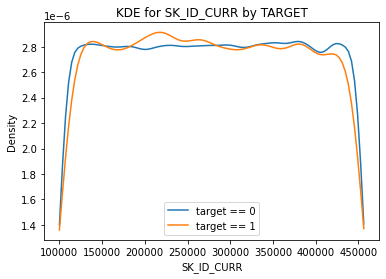

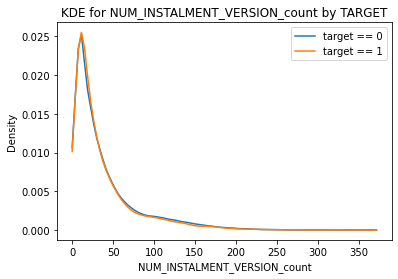

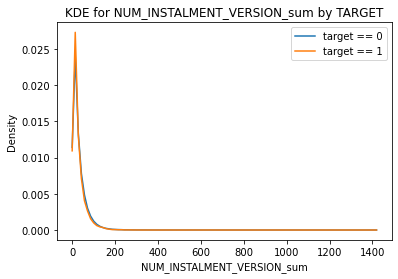

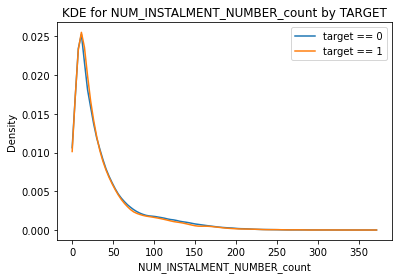

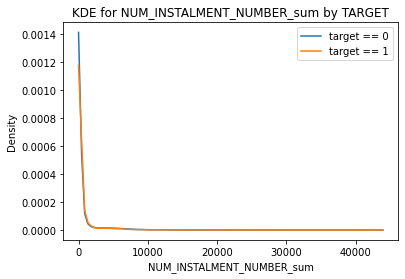

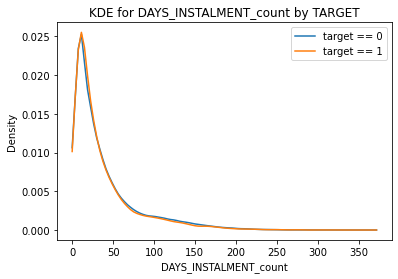

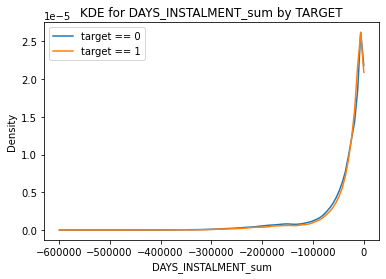

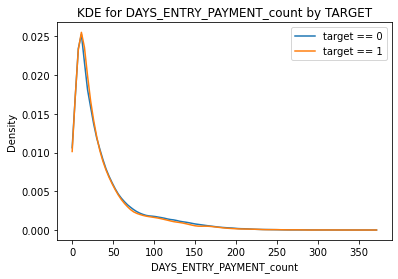

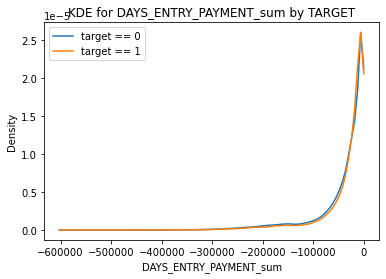

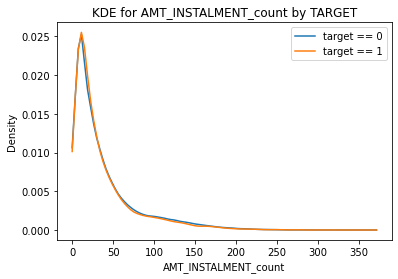

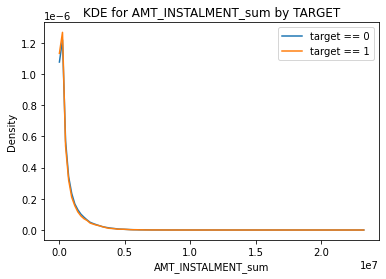

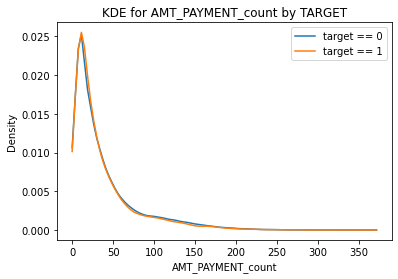

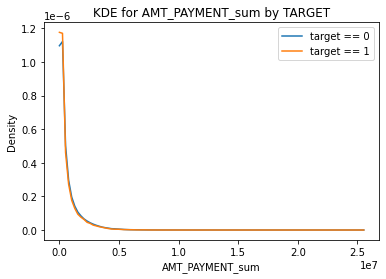

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde


for i, feature in enumerate(final_df[1:]):
    try:
        data_0 = final_df[final_df['TARGET'] == 0][feature]
        data_1 = final_df[final_df['TARGET'] == 1][feature]

        kde_0 = gaussian_kde(data_0)
        kde_1 = gaussian_kde(data_1)

        x_range = np.linspace(min(data_0.min(), data_1.min()), max(data_0.max(), data_1.max()), 100)

        plt.plot(x_range, kde_0(x_range), label='target == 0')
        plt.plot(x_range, kde_1(x_range), label='target == 1')

        plt.title(f'KDE for {feature} by TARGET')
        plt.xlabel(feature)
        plt.ylabel('Density')

        plt.legend()
        plt.show()
    except:
        pass